In [1]:


import os
import pandas as pd

# ✅ Project folder banao (Desktop par)
base_path = r"C:\Users\ACER\Desktop\Amazon_Project"

# Create folders
folders = ['data', 'notebooks', 'scripts', 'screenshots', 'reports']
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    print(f"✅ Created: {folder_path}")

print(f"\n📁 Project ready at: {base_path}")



# Source file (original location)
source_file = r"C:\Users\ACER\Desktop\amazon.csv"

# Destination file (project folder)
dest_file = os.path.join(base_path, 'data', 'amazon.csv')

# Copy file if it exists
if os.path.exists(source_file):
    import shutil
    shutil.copy2(source_file, dest_file)
    print(f"✅ Copied: {source_file} → {dest_file}")
else:
    print(f"❌ Source file not found: {source_file}")
    print("   Please manually copy your amazon.csv to:")
    print(f"   {os.path.join(base_path, 'data')}")



data_path = os.path.join(base_path, 'data', 'amazon.csv')

try:
    df = pd.read_csv(data_path)
    print(f"\n✅ Data loaded successfully!")
    print(f"   Rows: {len(df):,}")
    print(f"   Columns: {len(df.columns)}")
    print("\n📋 First 5 rows:")
    print(df.head())
    
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Created: C:\Users\ACER\Desktop\Amazon_Project\data
✅ Created: C:\Users\ACER\Desktop\Amazon_Project\notebooks
✅ Created: C:\Users\ACER\Desktop\Amazon_Project\scripts
✅ Created: C:\Users\ACER\Desktop\Amazon_Project\screenshots
✅ Created: C:\Users\ACER\Desktop\Amazon_Project\reports

📁 Project ready at: C:\Users\ACER\Desktop\Amazon_Project
✅ Copied: C:\Users\ACER\Desktop\amazon.csv → C:\Users\ACER\Desktop\Amazon_Project\data\amazon.csv

✅ Data loaded successfully!
   Rows: 1,465
   Columns: 16

📋 First 5 rows:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  

In [2]:
# =============================================
# CELL 1: Import all required libraries
# =============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from datetime import datetime

# Set style for better charts
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✅ Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


In [3]:
# =============================================
# CELL 3: Explore the data structure
# =============================================

print("🔍 DATA OVERVIEW")
print("="*50)

# First 5 rows
print("\n📋 First 5 rows:")
print(df.head())

# Last 5 rows
print("\n📋 Last 5 rows:")
print(df.tail())

# Column names
print("\n📋 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

# Data types
print("\n📋 Data Types:")
print(df.dtypes)

# Basic info
print("\n📋 DataFrame Info:")
df.info()

# Missing values
print("\n📋 Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct.round(2)})
print(missing_df[missing_df['Missing'] > 0])

🔍 DATA OVERVIEW

📋 First 5 rows:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2       24,269   
1  

In [4]:
# =============================================
# CELL 4: Clean price columns
# =============================================

print("💰 Cleaning price columns...")
print("="*50)

# Make a copy to avoid warnings
df_clean = df.copy()

# 1. Clean actual_price (jo screenshot mein dikha)
if 'actual_price' in df_clean.columns:
    print(f"\n📊 Before cleaning 'actual_price':")
    print(df_clean['actual_price'].head(10).tolist())
    
    # Convert to string
    df_clean['actual_price'] = df_clean['actual_price'].astype(str)
    
    # Remove '₹' symbol
    df_clean['actual_price'] = df_clean['actual_price'].str.replace('₹', '')
    
    # Remove 'a,' pattern (jo screenshot mein tha)
    df_clean['actual_price'] = df_clean['actual_price'].str.replace('a,', '')
    
    # Remove commas
    df_clean['actual_price'] = df_clean['actual_price'].str.replace(',', '')
    
    # Remove any non-numeric characters except decimal
    df_clean['actual_price'] = df_clean['actual_price'].str.replace(r'[^\d.]', '', regex=True)
    
    # Convert to float
    df_clean['actual_price'] = pd.to_numeric(df_clean['actual_price'], errors='coerce')
    
    print(f"\n📊 After cleaning:")
    print(df_clean['actual_price'].head(10).tolist())
    print(f"   ✅ actual_price cleaned")
else:
    print("   ❌ 'actual_price' column not found!")

# 2. Clean discount_percentage
if 'discount_percentage' in df_clean.columns:
    print(f"\n📊 Cleaning discount_percentage:")
    df_clean['discount_percentage'] = df_clean['discount_percentage'].astype(str)
    df_clean['discount_percentage'] = df_clean['discount_percentage'].str.replace('%', '')
    df_clean['discount_percentage'] = pd.to_numeric(df_clean['discount_percentage'], errors='coerce')
    print(f"   ✅ discount_percentage cleaned")
    print(f"   Sample: {df_clean['discount_percentage'].head(5).tolist()}")

# 3. Clean rating_count
if 'rating_count' in df_clean.columns:
    print(f"\n📊 Cleaning rating_count:")
    df_clean['rating_count'] = df_clean['rating_count'].astype(str)
    df_clean['rating_count'] = df_clean['rating_count'].str.replace(',', '')
    df_clean['rating_count'] = pd.to_numeric(df_clean['rating_count'], errors='coerce')
    print(f"   ✅ rating_count cleaned")
    print(f"   Sample: {df_clean['rating_count'].head(5).tolist()}")

💰 Cleaning price columns...

📊 Before cleaning 'actual_price':
['₹1,099', '₹349', '₹1,899', '₹699', '₹399', '₹1,000', '₹499', '₹299', '₹999', '₹299']

📊 After cleaning:
[1099.0, 349.0, 1899.0, 699.0, 399.0, 1000.0, 499.0, 299.0, 999.0, 299.0]
   ✅ actual_price cleaned

📊 Cleaning discount_percentage:
   ✅ discount_percentage cleaned
   Sample: [64, 43, 90, 53, 61]

📊 Cleaning rating_count:
   ✅ rating_count cleaned
   Sample: [24269.0, 43994.0, 7928.0, 94363.0, 16905.0]


In [5]:

print("📊 Calculating business metrics...")
print("="*50)

# Assume 40% cost of goods sold (industry average)
COGS_PERCENT = 0.40

# Calculate original price (before discount)
df_clean['original_price'] = df_clean['actual_price'] / (1 - df_clean['discount_percentage']/100)
df_clean['original_price'] = df_clean['original_price'].round(2)

# Calculate cost and profit
df_clean['estimated_cost'] = (df_clean['original_price'] * COGS_PERCENT).round(2)
df_clean['profit_per_unit'] = (df_clean['actual_price'] - df_clean['estimated_cost']).round(2)
df_clean['margin_percent'] = (df_clean['profit_per_unit'] / df_clean['actual_price'] * 100).round(2)

# Revenue metrics (using rating_count as sales volume proxy)
df_clean['estimated_revenue'] = (df_clean['actual_price'] * df_clean['rating_count'].fillna(1)).round(2)
df_clean['estimated_profit'] = (df_clean['profit_per_unit'] * df_clean['rating_count'].fillna(1)).round(2)

print("\n✅ Calculated columns:")
print(f"   - original_price: Price before discount")
print(f"   - estimated_cost: {COGS_PERCENT*100}% of original price")
print(f"   - profit_per_unit: Profit on each unit")
print(f"   - margin_percent: Profit margin percentage")
print(f"   - estimated_revenue: Using rating_count as sales volume")
print(f"   - estimated_profit: Total estimated profit")

print("\n📊 Sample calculations:")
print(df_clean[['product_id', 'actual_price', 'original_price', 'profit_per_unit', 'margin_percent']].head(10))

📊 Calculating business metrics...

✅ Calculated columns:
   - original_price: Price before discount
   - estimated_cost: 40.0% of original price
   - profit_per_unit: Profit on each unit
   - margin_percent: Profit margin percentage
   - estimated_revenue: Using rating_count as sales volume
   - estimated_profit: Total estimated profit

📊 Sample calculations:
   product_id  actual_price  original_price  profit_per_unit  margin_percent
0  B07JW9H4J1        1099.0         3052.78          -122.11          -11.11
1  B098NS6PVG         349.0          612.28           104.09           29.83
2  B096MSW6CT        1899.0        18990.00         -5697.00         -300.00
3  B08HDJ86NZ         699.0         1487.23           104.11           14.89
4  B08CF3B7N1         399.0         1023.08           -10.23           -2.56
5  B08Y1TFSP6        1000.0         6666.67         -1666.67         -166.67
6  B08WRWPM22         499.0         1425.71           -71.28          -14.28
7  B08DDRGWTJ         

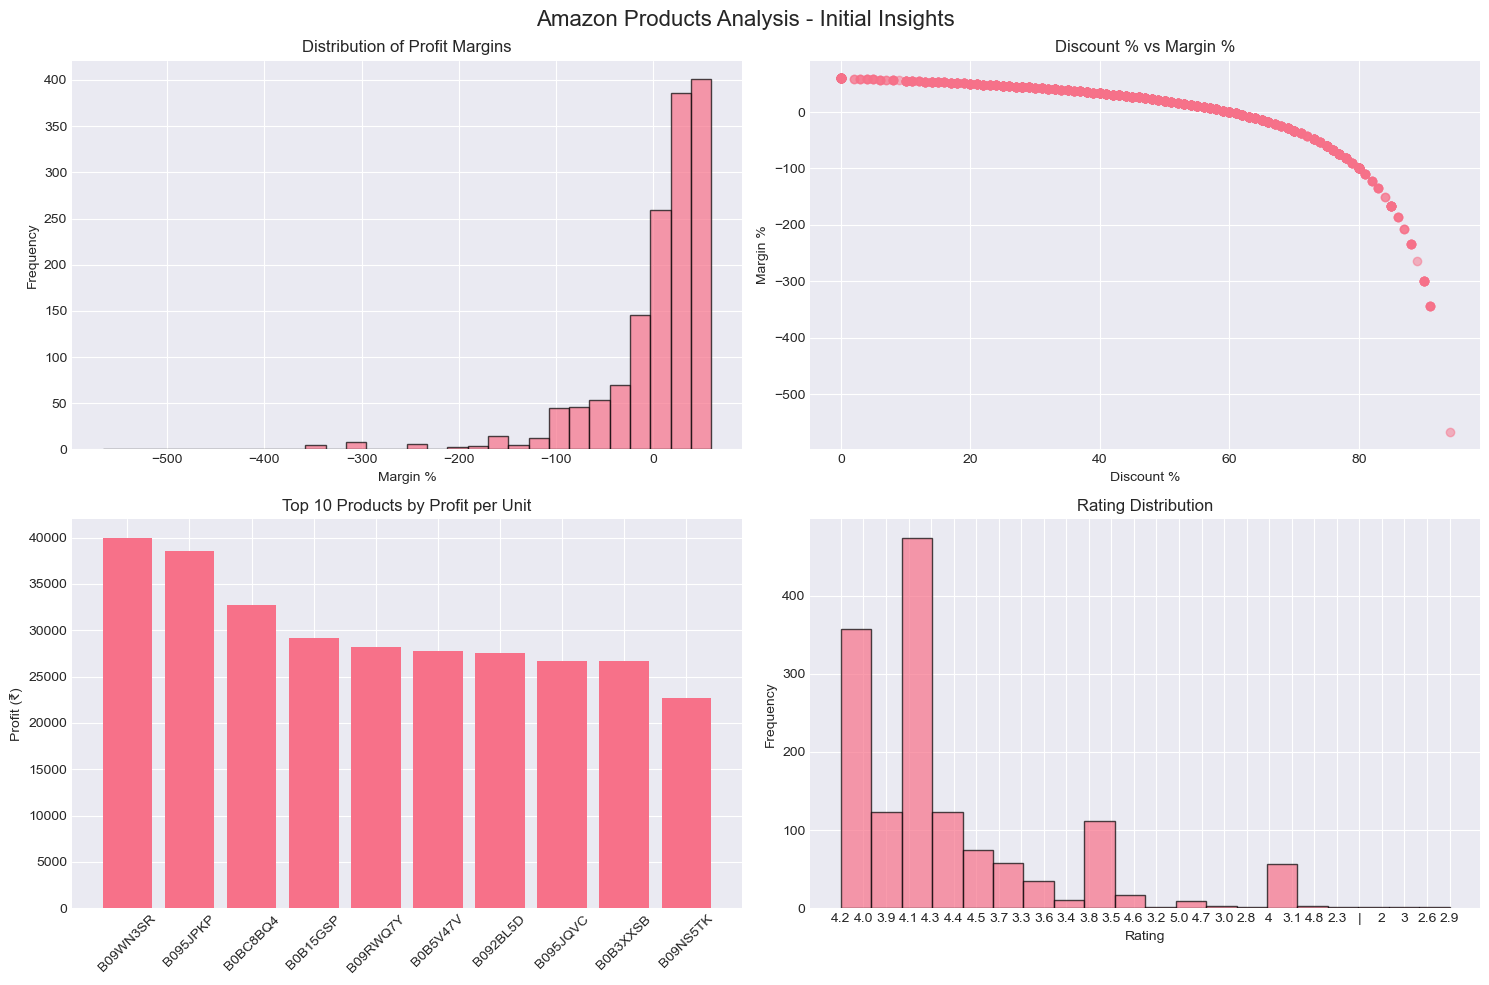

✅ Chart saved to screenshots folder


In [6]:
# =============================================
# CELL 6: Create basic visualizations
# =============================================

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Amazon Products Analysis - Initial Insights', fontsize=16)

# 1. Margin distribution
ax1 = axes[0, 0]
ax1.hist(df_clean['margin_percent'].dropna(), bins=30, edgecolor='black', alpha=0.7)
ax1.set_title('Distribution of Profit Margins')
ax1.set_xlabel('Margin %')
ax1.set_ylabel('Frequency')

# 2. Discount vs Margin
ax2 = axes[0, 1]
ax2.scatter(df_clean['discount_percentage'], df_clean['margin_percent'], alpha=0.5)
ax2.set_title('Discount % vs Margin %')
ax2.set_xlabel('Discount %')
ax2.set_ylabel('Margin %')

# 3. Top 10 products by profit
ax3 = axes[1, 0]
top_profit = df_clean.nlargest(10, 'profit_per_unit')[['product_id', 'profit_per_unit']]
ax3.bar(range(len(top_profit)), top_profit['profit_per_unit'].values)
ax3.set_title('Top 10 Products by Profit per Unit')
ax3.set_xticks(range(len(top_profit)))
ax3.set_xticklabels(top_profit['product_id'].astype(str).str[:8], rotation=45)
ax3.set_ylabel('Profit (₹)')

# 4. Rating distribution
ax4 = axes[1, 1]
ax4.hist(df_clean['rating'].dropna(), bins=20, edgecolor='black', alpha=0.7)
ax4.set_title('Rating Distribution')
ax4.set_xlabel('Rating')
ax4.set_ylabel('Frequency')

plt.tight_layout()
plt.savefig(os.path.join(base_path, 'screenshots', 'initial_analysis.png'))
plt.show()
print("✅ Chart saved to screenshots folder")

In [8]:


print("📊 Data Types Check:")
print(df_clean[['actual_price', 'discount_percentage', 'rating', 'rating_count', 
                'margin_percent', 'estimated_profit']].dtypes)

print("\n📊 Sample values:")
print(df_clean[['rating', 'rating_count']].head(10))

📊 Data Types Check:
actual_price           float64
discount_percentage      int64
rating                  object
rating_count           float64
margin_percent         float64
estimated_profit       float64
dtype: object

📊 Sample values:
  rating  rating_count
0    4.2       24269.0
1    4.0       43994.0
2    3.9        7928.0
3    4.2       94363.0
4    4.2       16905.0
5    3.9       24871.0
6    4.1       15188.0
7    4.3       30411.0
8    4.2      179691.0
9    4.0       43994.0


In [9]:

numeric_columns = ['rating', 'rating_count', 'actual_price', 'discount_percentage', 
                   'margin_percent', 'estimated_profit', 'profit_per_unit']

for col in numeric_columns:
    if col in df_clean.columns:
        # Convert to numeric, errors='coerce' means invalid values become NaN
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"✅ Converted {col} to numeric")

print("\n📊 After conversion:")
print(df_clean[numeric_columns].dtypes)

✅ Converted rating to numeric
✅ Converted rating_count to numeric
✅ Converted actual_price to numeric
✅ Converted discount_percentage to numeric
✅ Converted margin_percent to numeric
✅ Converted estimated_profit to numeric
✅ Converted profit_per_unit to numeric

📊 After conversion:
rating                 float64
rating_count           float64
actual_price           float64
discount_percentage      int64
margin_percent         float64
estimated_profit       float64
profit_per_unit        float64
dtype: object


📊 CATEGORY-WISE ANALYSIS

✅ Unique categories: 211
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64

📋 Category Summary (by profit):
                                                    product_count  avg_price  \
category                                                                       
Electronics|Mobiles&Accessories|Smartphones&Bas...             68   20593.40   
Electronics|HomeTheater,TV&Video|Televisions|Sm...             63   40132.84   
Computers&Accessories|ExternalDevices&DataStora...              6    4642.67   
Electronics|Mobiles&Accessories|Mobi

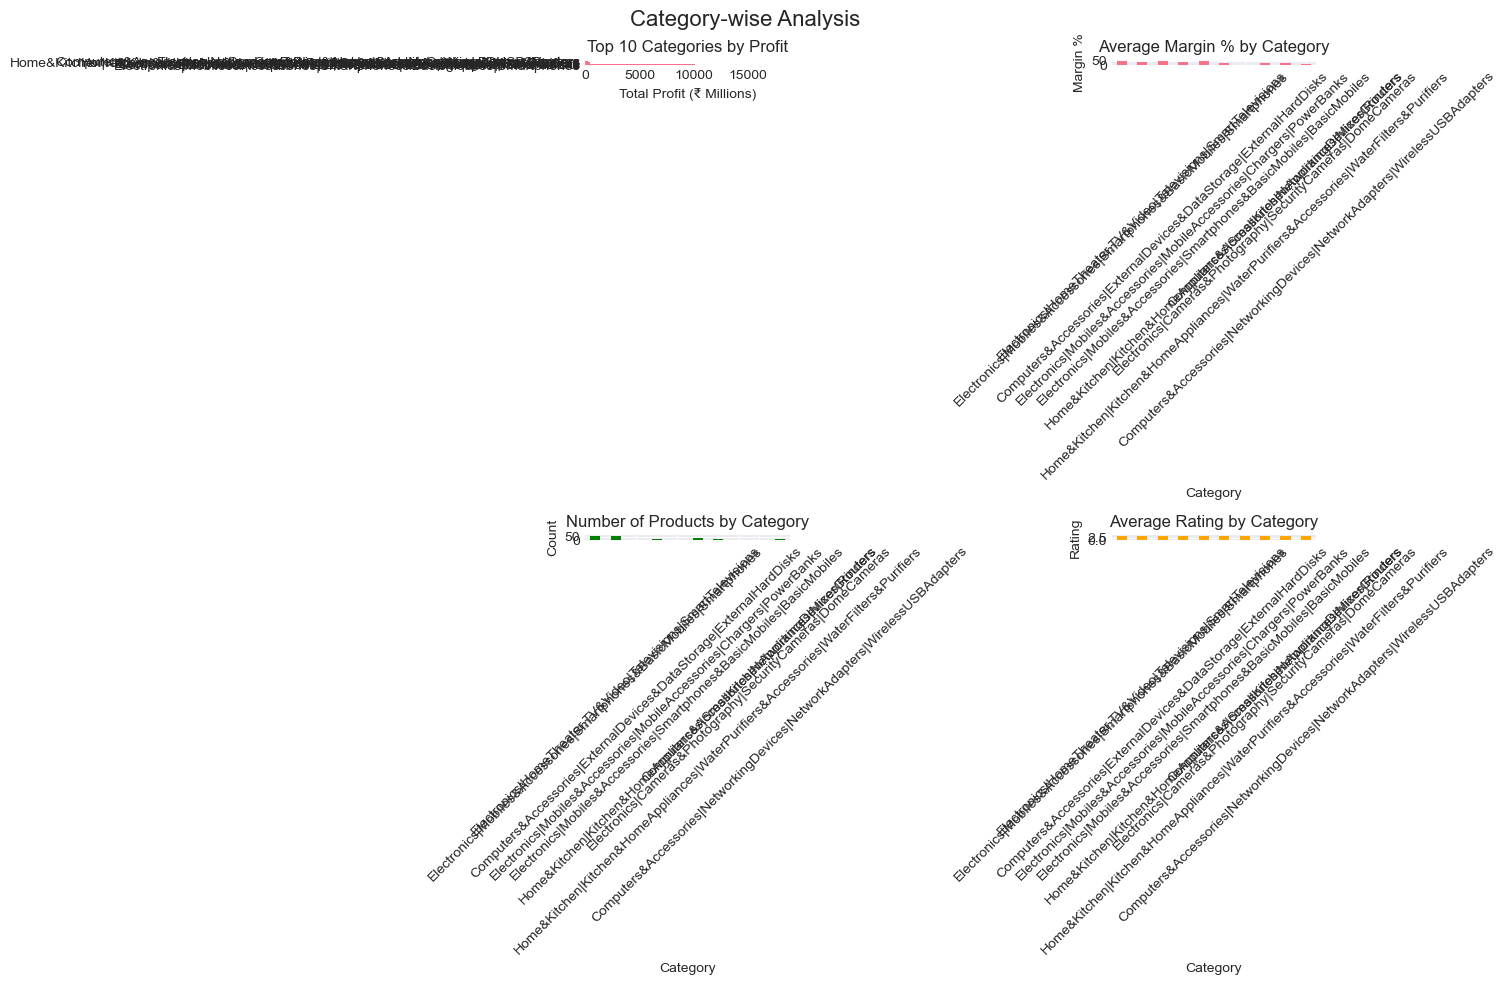


🔍 KEY INSIGHTS:
   • Most profitable category: Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones (₹17946.5M)
   • Highest margin category: 60.0%
   • Most products in: 233 products
   • Best rated category: 4.60 ⭐


In [10]:


print("📊 CATEGORY-WISE ANALYSIS")
print("="*50)

# Check if category column exists
if 'category' in df_clean.columns:
    
    # Clean category column (remove any special characters)
    df_clean['category'] = df_clean['category'].astype(str).str.strip()
    
    # Remove rows where category is empty or invalid
    df_clean = df_clean[df_clean['category'].notna()]
    df_clean = df_clean[df_clean['category'] != 'nan']
    
    print(f"\n✅ Unique categories: {df_clean['category'].nunique()}")
    print(df_clean['category'].value_counts().head())
    
    # Category summary - simplified version
    category_summary = df_clean.groupby('category').agg(
        product_count=('product_id', 'count'),
        avg_price=('actual_price', 'mean'),
        min_price=('actual_price', 'min'),
        max_price=('actual_price', 'max'),
        avg_margin=('margin_percent', 'mean'),
        avg_rating=('rating', 'mean'),
        total_rating_count=('rating_count', 'sum'),
        total_profit=('estimated_profit', 'sum')
    ).round(2)
    
    # Sort by total profit
    category_summary = category_summary.sort_values('total_profit', ascending=False)
    
    print("\n📋 Category Summary (by profit):")
    print(category_summary)
    
    # Visualization
    import matplotlib.pyplot as plt
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Category-wise Analysis', fontsize=16)
    
    # 1. Profit by category
    ax1 = axes[0, 0]
    top_categories = category_summary.head(10)
    ax1.barh(range(len(top_categories)), top_categories['total_profit'].values/1e6)
    ax1.set_yticks(range(len(top_categories)))
    ax1.set_yticklabels(top_categories.index)
    ax1.set_xlabel('Total Profit (₹ Millions)')
    ax1.set_title('Top 10 Categories by Profit')
    
    # 2. Average margin by category
    ax2 = axes[0, 1]
    category_summary.head(10)['avg_margin'].plot(kind='bar', ax=ax2)
    ax2.set_title('Average Margin % by Category')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Margin %')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Product count by category
    ax3 = axes[1, 0]
    category_summary.head(10)['product_count'].plot(kind='bar', ax=ax3, color='green')
    ax3.set_title('Number of Products by Category')
    ax3.set_xlabel('Category')
    ax3.set_ylabel('Count')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Avg rating by category
    ax4 = axes[1, 1]
    category_summary.head(10)['avg_rating'].plot(kind='bar', ax=ax4, color='orange')
    ax4.set_title('Average Rating by Category')
    ax4.set_xlabel('Category')
    ax4.set_ylabel('Rating')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(os.path.join(base_path, 'screenshots', 'category_analysis.png'))
    plt.show()
    
    # Key insights
    print("\n🔍 KEY INSIGHTS:")
    print(f"   • Most profitable category: {category_summary.index[0]} (₹{category_summary.iloc[0]['total_profit']/1e6:.1f}M)")
    print(f"   • Highest margin category: {category_summary.loc[category_summary['avg_margin'].idxmax(), 'avg_margin']:.1f}%")
    print(f"   • Most products in: {category_summary.loc[category_summary['product_count'].idxmax(), 'product_count']} products")
    print(f"   • Best rated category: {category_summary.loc[category_summary['avg_rating'].idxmax(), 'avg_rating']:.2f} ⭐")
    
else:
    print("❌ Category column not found!")
    # Show column names to help identify
    print("\nAvailable columns:")
    for i, col in enumerate(df_clean.columns, 1):
        print(f"   {i}. {col}")

📊 CATEGORY-WISE ANALYSIS
✅ Converted rating
✅ Converted rating_count
✅ Converted actual_price
✅ Converted discount_percentage
✅ Converted margin_percent
✅ Converted estimated_profit
✅ Converted profit_per_unit

✅ Unique categories: 211

📋 Category Summary:
                                                    product_count  avg_price  \
category                                                                       
Electronics|Mobiles&Accessories|Smartphones&Bas...             68   20593.40   
Electronics|HomeTheater,TV&Video|Televisions|Sm...             63   40132.84   
Computers&Accessories|ExternalDevices&DataStora...              6    4642.67   
Electronics|Mobiles&Accessories|MobileAccessori...             12    2524.00   
Electronics|Mobiles&Accessories|Smartphones&Bas...              9    2155.89   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...             27    5289.59   
Home&Kitchen|Kitchen&HomeAppliances|WaterPurifi...             12   15618.83   
Electronics|Cameras&Pho

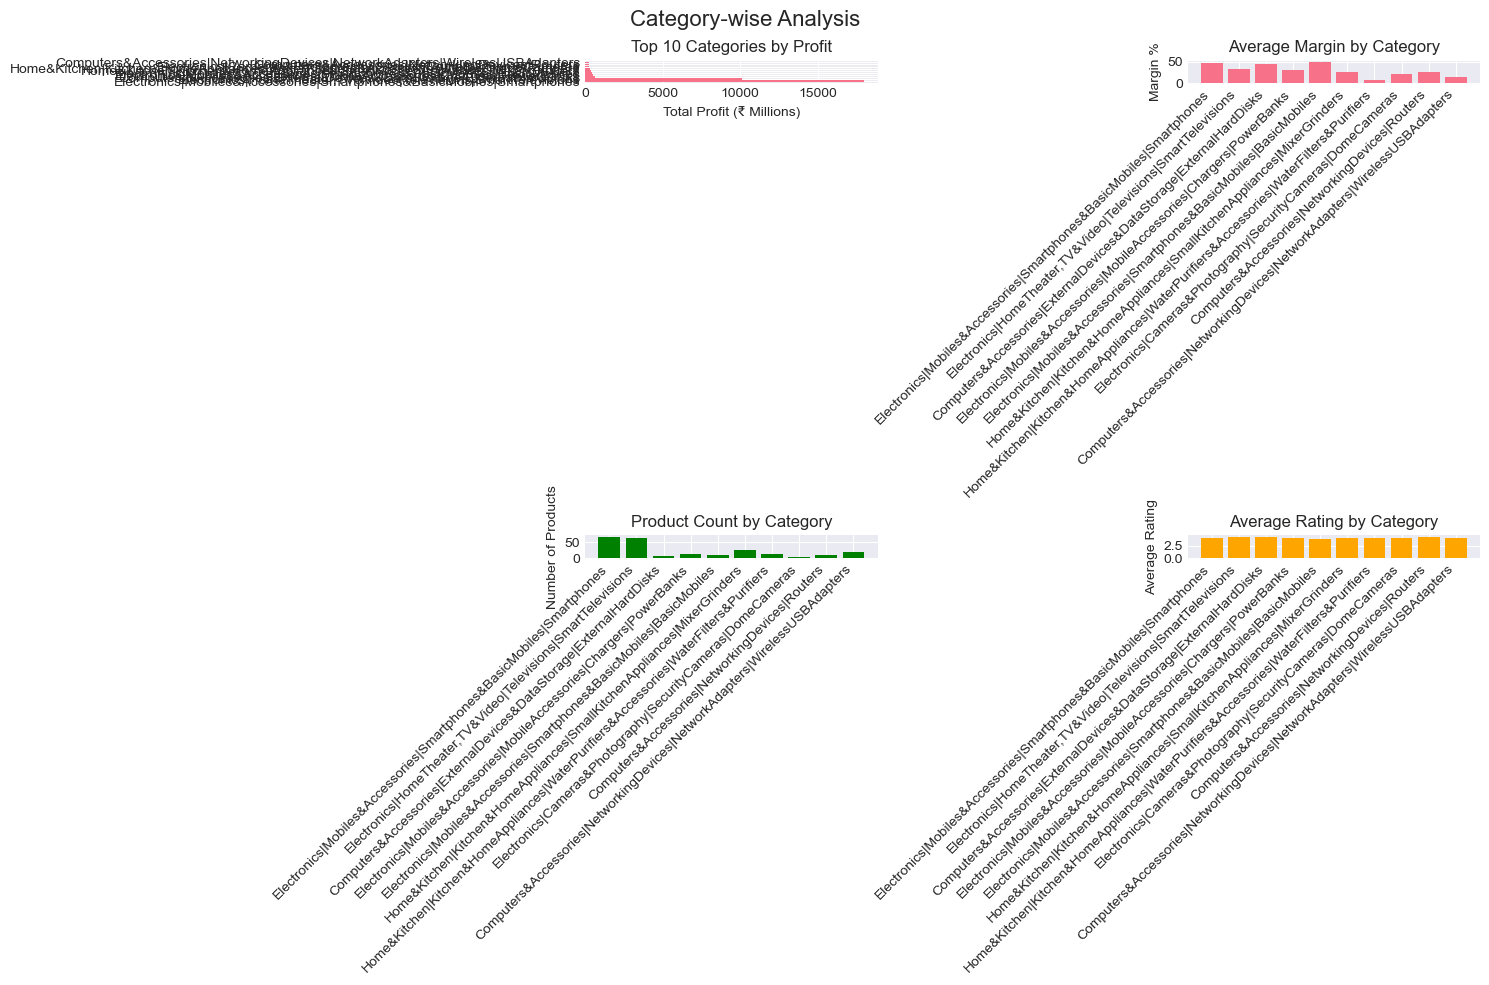


🔍 KEY INSIGHTS FROM CATEGORY ANALYSIS

💰 Most Profitable: Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones
   • Total Profit: ₹17946.5M
   • Avg Margin: 47.2%

📈 Highest Margin: OfficeProducts|OfficeElectronics|Calculators|Basic
   • Margin: 60.0%

📦 Most Products: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
   • Products: 233

⭐ Best Rated: Computers&Accessories|Tablets
   • Rating: 4.60


In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print("📊 CATEGORY-WISE ANALYSIS")
print("="*50)

# Step 1: Ensure all numeric columns are properly typed
numeric_cols = ['rating', 'rating_count', 'actual_price', 'discount_percentage', 
                'margin_percent', 'estimated_profit', 'profit_per_unit']

for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f"✅ Converted {col}")

# Step 2: Handle missing values
df_clean['rating'] = df_clean['rating'].fillna(df_clean['rating'].median())
df_clean['rating_count'] = df_clean['rating_count'].fillna(1)

# Step 3: Clean category column
if 'category' in df_clean.columns:
    df_clean['category'] = df_clean['category'].astype(str).str.strip()
    df_clean = df_clean[df_clean['category'].notna()]
    df_clean = df_clean[df_clean['category'] != 'nan']
    df_clean = df_clean[df_clean['category'] != '']

    print(f"\n✅ Unique categories: {df_clean['category'].nunique()}")
    
    # Step 4: Group by category
    category_summary = df_clean.groupby('category').agg({
        'product_id': 'count',
        'actual_price': ['mean', 'min', 'max'],
        'margin_percent': 'mean',
        'rating': 'mean',
        'rating_count': 'sum',
        'estimated_profit': 'sum'
    }).round(2)
    
    # Flatten column names
    category_summary.columns = ['product_count', 'avg_price', 'min_price', 'max_price',
                                'avg_margin', 'avg_rating', 'total_rating_count', 'total_profit']
    
    # Sort by total profit
    category_summary = category_summary.sort_values('total_profit', ascending=False)
    
    print("\n📋 Category Summary:")
    print(category_summary.head(20))
    
    # Step 5: Visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Category-wise Analysis', fontsize=16)
    
    # Top 10 by profit
    top10 = category_summary.head(10)
    
    # Profit
    axes[0, 0].barh(range(len(top10)), top10['total_profit'].values/1e6)
    axes[0, 0].set_yticks(range(len(top10)))
    axes[0, 0].set_yticklabels(top10.index)
    axes[0, 0].set_xlabel('Total Profit (₹ Millions)')
    axes[0, 0].set_title('Top 10 Categories by Profit')
    
    # Margin
    axes[0, 1].bar(range(len(top10)), top10['avg_margin'].values)
    axes[0, 1].set_xticks(range(len(top10)))
    axes[0, 1].set_xticklabels(top10.index, rotation=45, ha='right')
    axes[0, 1].set_ylabel('Margin %')
    axes[0, 1].set_title('Average Margin by Category')
    
    # Product count
    axes[1, 0].bar(range(len(top10)), top10['product_count'].values, color='green')
    axes[1, 0].set_xticks(range(len(top10)))
    axes[1, 0].set_xticklabels(top10.index, rotation=45, ha='right')
    axes[1, 0].set_ylabel('Number of Products')
    axes[1, 0].set_title('Product Count by Category')
    
    # Rating
    axes[1, 1].bar(range(len(top10)), top10['avg_rating'].values, color='orange')
    axes[1, 1].set_xticks(range(len(top10)))
    axes[1, 1].set_xticklabels(top10.index, rotation=45, ha='right')
    axes[1, 1].set_ylabel('Average Rating')
    axes[1, 1].set_title('Average Rating by Category')
    
    plt.tight_layout()
    plt.savefig(os.path.join(base_path, 'screenshots', 'category_analysis.png'), 
                bbox_inches='tight', dpi=100)
    plt.show()
    
    # Step 6: Key Insights
    print("\n" + "="*50)
    print("🔍 KEY INSIGHTS FROM CATEGORY ANALYSIS")
    print("="*50)
    
    most_profitable = category_summary.index[0]
    highest_margin = category_summary.loc[category_summary['avg_margin'].idxmax()].name
    most_products = category_summary.loc[category_summary['product_count'].idxmax()].name
    best_rated = category_summary.loc[category_summary['avg_rating'].idxmax()].name
    
    print(f"\n💰 Most Profitable: {most_profitable}")
    print(f"   • Total Profit: ₹{category_summary.loc[most_profitable, 'total_profit']/1e6:.1f}M")
    print(f"   • Avg Margin: {category_summary.loc[most_profitable, 'avg_margin']:.1f}%")
    
    print(f"\n📈 Highest Margin: {highest_margin}")
    print(f"   • Margin: {category_summary.loc[highest_margin, 'avg_margin']:.1f}%")
    
    print(f"\n📦 Most Products: {most_products}")
    print(f"   • Products: {category_summary.loc[most_products, 'product_count']}")
    
    print(f"\n⭐ Best Rated: {best_rated}")
    print(f"   • Rating: {category_summary.loc[best_rated, 'avg_rating']:.2f}")
    
else:
    print("❌ Category column not found!")
    print("\nAvailable columns:")
    print(df_clean.columns.tolist())

In [13]:

# CELL 8: Save cleaned data

# Save full cleaned data
cleaned_path = os.path.join(base_path, 'data', 'amazon_cleaned.csv')
df_clean.to_csv(cleaned_path, index=False)
print(f"✅ Full cleaned data saved to: {cleaned_path}")

# Save sample for GitHub (100 rows)
sample_path = os.path.join(base_path, 'data', 'amazon_sample.csv')
df_clean.sample(min(100, len(df_clean))).to_csv(sample_path, index=False)
print(f"✅ Sample data saved to: {sample_path}")

print(f"\n📊 Final dataset: {len(df_clean):,} rows, {len(df_clean.columns)} columns")

✅ Full cleaned data saved to: C:\Users\ACER\Desktop\Amazon_Project\data\amazon_cleaned.csv
✅ Sample data saved to: C:\Users\ACER\Desktop\Amazon_Project\data\amazon_sample.csv

📊 Final dataset: 1,465 rows, 22 columns
